## ML Project 5 - Dataset on loan lending
### Predicting if individuals will pay back their loans based on various features

In [360]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib import pyplot
import seaborn as sns
sns.set_style("whitegrid")
from scipy.stats import norm
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import sklearn.metrics as metrics

from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn import ensemble
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from xgboost import XGBClassifier
from plotnine import *

import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objs as go
%matplotlib inline
from plotly.offline import plot, iplot, init_notebook_mode as py
import plotly.graph_objs as go

#for standardising data
from sklearn.preprocessing import StandardScaler

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/loan-data/loan_data.csv


### Preliminary Data Analysis

In [361]:
df = pd.read_csv('../input/loan-data/loan_data.csv')
df.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [362]:
print(df.shape)
print(df.info())

(9578, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
None


In [363]:
dict = {}
for col in list(df.columns):
    dict[col] = df[col].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).T

,unique count
credit.policy,2
purpose,7
int.rate,249
installment,4788
log.annual.inc,1987
dti,2529
fico,44
days.with.cr.line,2687
revol.bal,7869
revol.util,1035


### Checking for any null values

In [364]:
df.isnull().values.any()


False

There is no null values as indicated above

### Data Visualization and EDA

Text(0.5, 0, 'Fico')

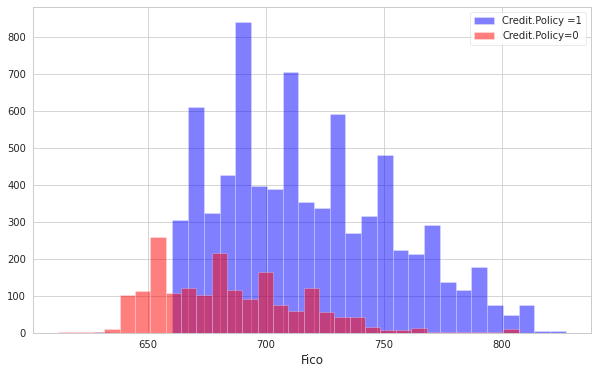

In [365]:
plt.figure(figsize=(10,6))
df[df['credit.policy'] == 1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy =1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('Fico')

Text(0.5, 0, 'Fico')

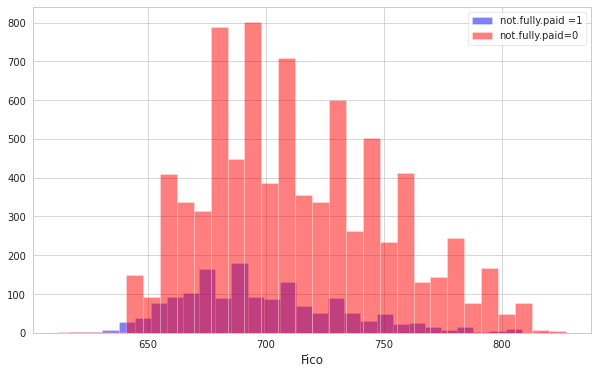

In [366]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid'] == 1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='not.fully.paid =1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('Fico')

<AxesSubplot:xlabel='purpose', ylabel='count'>

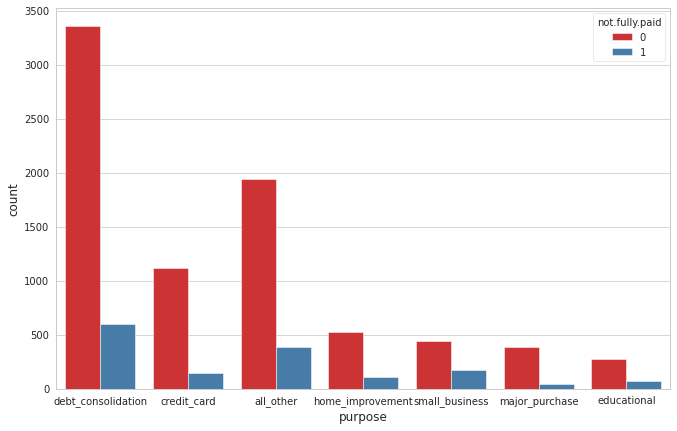

In [367]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose', hue='not.fully.paid', data=df,palette='Set1')

#### Relationship between FICO score and interest rate

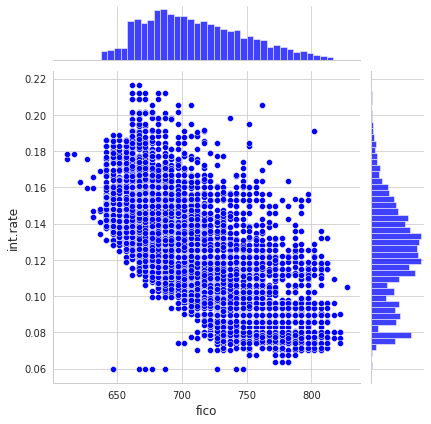

In [368]:
sns.jointplot(x='fico', y='int.rate', data=df, color='blue')

<Figure size 792x504 with 0 Axes>

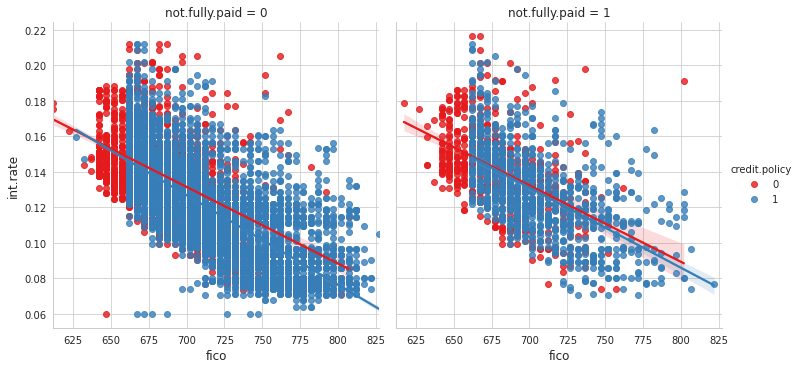

In [369]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico', data=df, hue='credit.policy',col='not.fully.paid',palette='Set1')

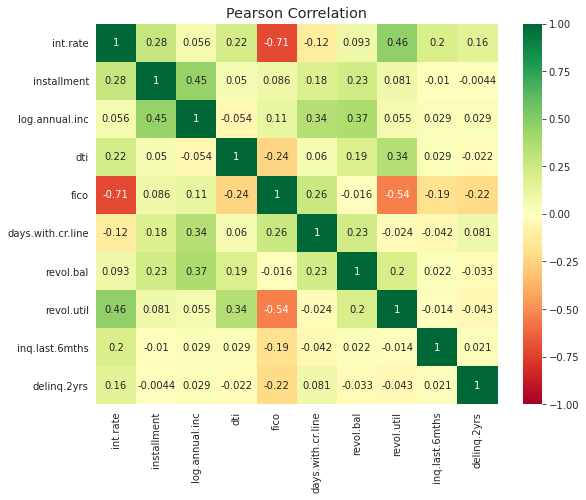

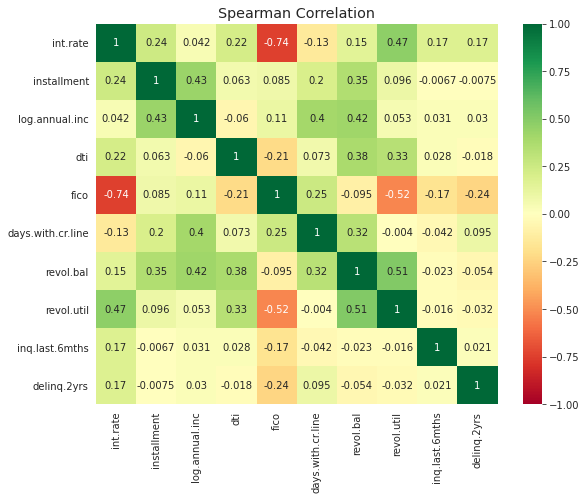

In [370]:
features_num = ['int.rate', 'installment', 'log.annual.inc',
                'dti', 'fico', 'days.with.cr.line',
                'revol.bal', 'revol.util',
                'inq.last.6mths', 'delinq.2yrs']
corr_pearson = df[features_num].corr(method='pearson')
corr_spearman = df[features_num].corr(method='spearman')

fig = plt.figure(figsize = (9,7))
sns.heatmap(corr_pearson, annot=True, cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title('Pearson Correlation')
plt.show()

fig = plt.figure(figsize = (9,7))
sns.heatmap(corr_spearman, annot=True, cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title('Spearman Correlation')
plt.show()

### Data Processing

In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


The only object feature in this dataset is 'Purpose', as we can see above from info. Therefore,
in order to preparing the data for training and prediction, we need to convert this categorical
feature into various dummy variables.

In [372]:
cat_feats = ['purpose']

In [373]:
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [374]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

### Train Test Split

In [375]:
X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']

In [376]:
X

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,0,0,0,1,0,0


In [377]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9573    1
9574    1
9575    1
9576    1
9577    1
Name: not.fully.paid, Length: 9578, dtype: int64

In [378]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

### Model 1: Decision Tree Classifier

In [379]:
from sklearn.tree import DecisionTreeClassifier

In [380]:
dtree = DecisionTreeClassifier()

In [381]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [382]:
y_pred = dtree.predict(X_test)
predictions = [round(value) for value in y_pred]

#### Evaluations

In [383]:
from sklearn.metrics import classification_report, confusion_matrix

In [384]:
accuracy = accuracy_score(y_test,predictions)
print("Accuracy: %.2f%%" %(accuracy*100.00))

Accuracy: 72.41%


In [385]:
precision = precision_score(y_test, predictions)
print("Precision: %.2f%%" %(precision*100.00))

Precision: 17.83%


In [386]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2431
           1       0.16      0.18      0.17       443

    accuracy                           0.73      2874
   macro avg       0.50      0.50      0.50      2874
weighted avg       0.74      0.73      0.73      2874



### Model 2 -  Random Forest

In [387]:
from sklearn.ensemble import RandomForestClassifier
pipe_RandFor = Pipeline([('RandomForest',RandomForestClassifier())])

rf_model = pipe_RandFor.fit(X_train, y_train)

#### Evaluations

In [388]:
accuracy = rf_model.score(X_test, y_test)
print("Accuracy: %.2f%%" %(accuracy*100.00))

Accuracy: 84.62%


In [389]:
precision = precision_score(y_test, predictions)
print("Precision : %.2f%%" %(precision*100.00))

Precision : 17.83%


In [390]:
predictions = rf_model.predict(X_test)

print(classification_report(y_test,predictions))


print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2431
           1       0.52      0.03      0.06       443

    accuracy                           0.85      2874
   macro avg       0.68      0.51      0.49      2874
weighted avg       0.80      0.85      0.78      2874

[[2418   13]
 [ 429   14]]


Feature: 0, Score: 0.04551
Feature: 1, Score: 0.11260
Feature: 2, Score: 0.10964
Feature: 3, Score: 0.09494
Feature: 4, Score: 0.09127
Feature: 5, Score: 0.08444
Feature: 6, Score: 0.09942
Feature: 7, Score: 0.09667
Feature: 8, Score: 0.10247
Feature: 9, Score: 0.07748
Feature: 10, Score: 0.01497
Feature: 11, Score: 0.01185
Feature: 12, Score: 0.00889
Feature: 13, Score: 0.01156
Feature: 14, Score: 0.00521
Feature: 15, Score: 0.00797
Feature: 16, Score: 0.00414
Feature: 17, Score: 0.02094


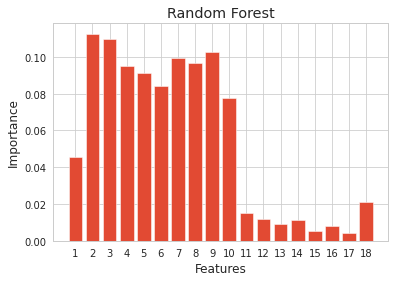

In [391]:
rf_clf = RandomForestClassifier(max_depth=10)
rf_clf.fit(X_train,y_train)
importance = rf_clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
ind = [x for x in range(len(importance))]
pyplot.bar(ind, importance)
pyplot.title('Random Forest')
pyplot.xticks(ind, ('1', '2', '3', '4', '5','6','7','8','9','10','11','12','13','14','15','16','17','18'))
pyplot.xlabel('Features')
pyplot.ylabel('Importance')
pyplot.show()

### Model 3 - XGBoost Classifier

In [392]:
model3 = XGBClassifier()
model3.fit(X_train, y_train)

[21:42:23] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [393]:
y_pred = model3.predict(X_test)
predictions = [round(value) for value in y_pred]

#### Evaluations

In [394]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" %(accuracy*100.00))

Accuracy: 83.26%


In [395]:
precision = precision_score(y_test, predictions)
print("Precision : %.2f%%" %(precision*100.00))

Precision : 33.90%


In [396]:
f1score = f1_score(y_test,y_pred, average='macro')
print('F1 Score:', f1score)

F1 Score: 0.5249353329848686


### Model 4 - Logistic Model

In [403]:
model4 = LogisticRegression(solver='liblinear')
model4.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [404]:
y_pred = model4.predict(X_test)
predictions = [round(value) for value in y_pred]

In [405]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" %(accuracy*100.00))

Accuracy: 84.62%


In [406]:
precision = precision_score(y_test, predictions)
print("Precision : %.2f%%" %(precision*100.00))

Precision : 54.55%


### Fine Tuning on Threshold

<AxesSubplot:xlabel='Decision Threshold', ylabel='Values'>

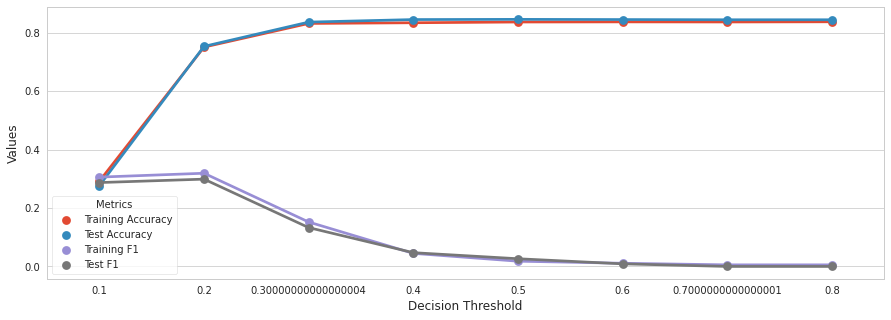

In [407]:
train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
thresholds = []

#for thresh in np.linspace(0.1,0.9,8): ## Sweeping from threshold of 0.1 to 0.9
for thresh in np.arange(0.1,0.9,0.1):
    logreg_clf = LogisticRegression(solver='liblinear')
    logreg_clf.fit(X_train,y_train)
    
    y_pred_train_thresh = logreg_clf.predict_proba(X_train)[:,1]
    y_pred_train = (y_pred_train_thresh > thresh).astype(int)

    train_acc = accuracy_score(y_train,y_pred_train)
    train_f1 = f1_score(y_train,y_pred_train)
    
    y_pred_test_thresh = logreg_clf.predict_proba(X_test)[:,1]
    y_pred_test = (y_pred_test_thresh > thresh).astype(int) 
    
    test_acc = accuracy_score(y_test,y_pred_test)
    test_f1 = f1_score(y_test,y_pred_test)
    
    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_acc)
    test_f1_scores.append(test_f1)
    thresholds.append(thresh)
    
    
Threshold_logreg = {"Training Accuracy": train_accuracies, "Test Accuracy": test_accuracies, "Training F1": train_f1_scores, "Test F1":test_f1_scores, "Decision Threshold": thresholds }
Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_logreg)

plot_df = Threshold_logreg_df.melt('Decision Threshold',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Decision Threshold", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [408]:
thresh = 0.2 ### Threshold chosen from above Curves
y_pred_test_thresh = logreg_clf.predict_proba(X_test)[:,1]
y_pred = (y_pred_test_thresh > thresh).astype(int) 
print("Test Accuracy: ",round(accuracy_score(y_test,y_pred)*100,2),"%")
print("Test F1 Score: ",round(f1_score(y_test,y_pred),4))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  75.37 %
Test F1 Score:  0.299
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,2015,416,2431
1,292,151,443
All,2307,567,2874
